In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.io import loadmat
from random import choices
import copy
from scipy.sparse import issparse
from statistics import mean,stdev
from utils.fileload import load_matfile

## 1. Transform edgelist to Graph

## 1.1 cluster size distribution

In [4]:
def percolate(G, beta, unWeighted=True):
    '''
    Here we don't consider Directed/Weighted graph 
    
    '''
    edges_percolated = []
    G_percolated = nx.Graph()
    assert(G_percolated.number_of_nodes() == 0)
    numPercolatedEdges = int(beta*G.number_of_edges())
    G_percolated.add_nodes_from(list(G.nodes))
    if unWeighted:
        edges_percolated = choices(list(G.edges), k=numPercolatedEdges)
        assert(len(edges_percolated) ==  numPercolatedEdges)
        G_percolated.add_edges_from(edges_percolated)
#     else:
#         bond percolation probability depends on the edge's weight
    return G_percolated

In [5]:
from tqdm import tqdm
def node_cluster_sizes(G, beta = 0.02,numIter = 100, nodes = [131,222,323]):
    nodes_sizes = {n: [] for n in nodes}
    for i in tqdm(range(numIter)):
        G_percolated = percolate(G, beta)
        # k_131 = 126,  k_222 = 27, k_323 = 48
        for n in nodes:
            nodes_sizes[n] += [len(nx.node_connected_component(G_percolated,n))]
    return nodes_sizes

In [3]:
# G_FB = nx.read_edgelist("NOLAfacebook.csv",create_using=nx.Graph(),delimiter=",", nodetype=int)
# nodes_sizes = node_cluster_sizes(G_FB)
# k_131 = 126,  k_222 = 27, k_323 = 48
# nodes_sizes = node_cluster_sizes(G_blogcatalog, nodes = [131,222,323])

In [6]:
# "blogcatalog.mat" is a undirected, unweighted graph
G_blogcatalog = load_matfile(file_ = "data/blogcatalog.mat")
assert(G_blogcatalog.number_of_nodes() == 10312)
assert(G_blogcatalog.number_of_edges() == 333983)
# k_4 = 115,  k_484 = 25, k_60 = 29
nodes_sizes = node_cluster_sizes(G_blogcatalog, nodes = [4,484,60])

100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


In [134]:
def plot_s_dist(nodes_sizes, log_x = True, log_y = False):
    for k, sizes in nodes_sizes.items():
        plt.figure(int(k))
        if log_x:
            bins = np.linspace(0,np.log2(max(sizes)),101)
#             plt.xticks(bins, ["2^%s" % i for i in bins])
            plt.hist(np.log2(sizes), log=log_y, bins=bins)
        else:
            bins = range(10)
#             bins = range(0,max(sizes), 10)
            plt.hist(sizes, log=log_y, bins=bins)
    
        plt.show()

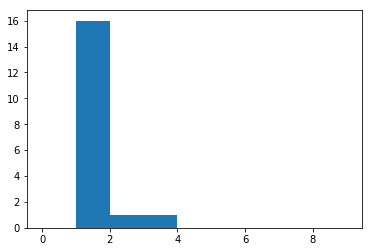

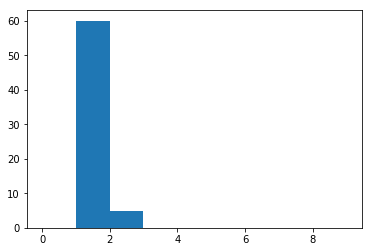

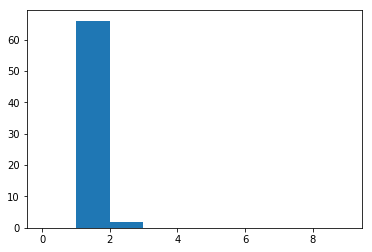

In [135]:
plot_s_dist(nodes_sizes, log_x = False)


In [136]:
nodes_sizes[4]
100*(1-0.02)**25

60.34647297788966